In [1]:
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("data/neurosynth_60_0.4.pkl")

In [2]:
from classification import RegionalClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
clf = RegionalClassifier(dataset, 'images/cluster_labels_k3.nii.gz', GaussianNB())

In [4]:
clf.classify()

Classifying...
[##########] 100%


In [5]:
import pandas as pd
word_keys = pd.read_csv("data/topic_keys60-july_cognitive.csv")
word_keys['top_2'] = word_keys['Top words'].apply(lambda x: x.split(' ')[0] + ' ' + x.split(' ')[1])
word_keys['topic_name'] = "topic" + word_keys['topic'].astype('str')

In [6]:
feature_nicknames = pd.merge(pd.DataFrame(clf.feature_names, columns=['topic_name']), word_keys)['Topic name'].tolist()

In [7]:
from plotting import plot_clf_polar

:0: FutureWarning: IPython widgets are experimental and may change in the future.


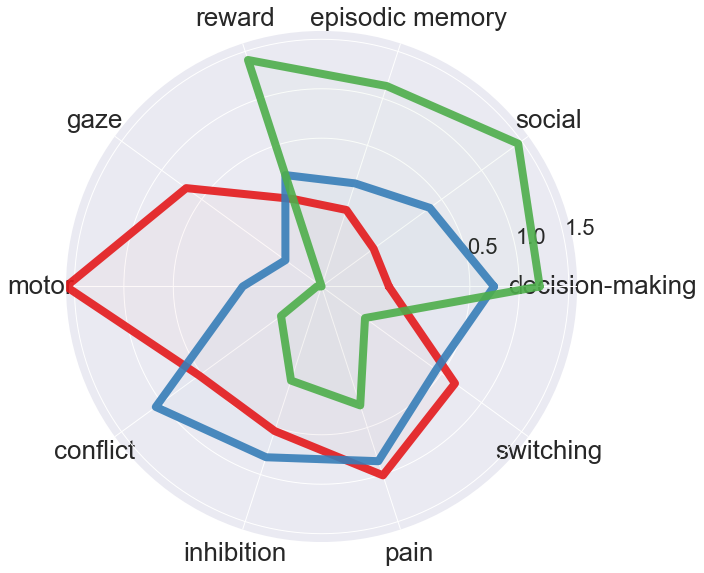

In [8]:
_ = plot_clf_polar(clf, n_top=4, reorder=True, feature_names = feature_nicknames)

In [9]:
selected_labels = ['fear', 
 'reward',
 'gaze',
 'motor',
 'inhibition',
 'WM',
 'conflict',
 'switching',
'pain',
 'decision-making',
 'social',
 'episodic memory']

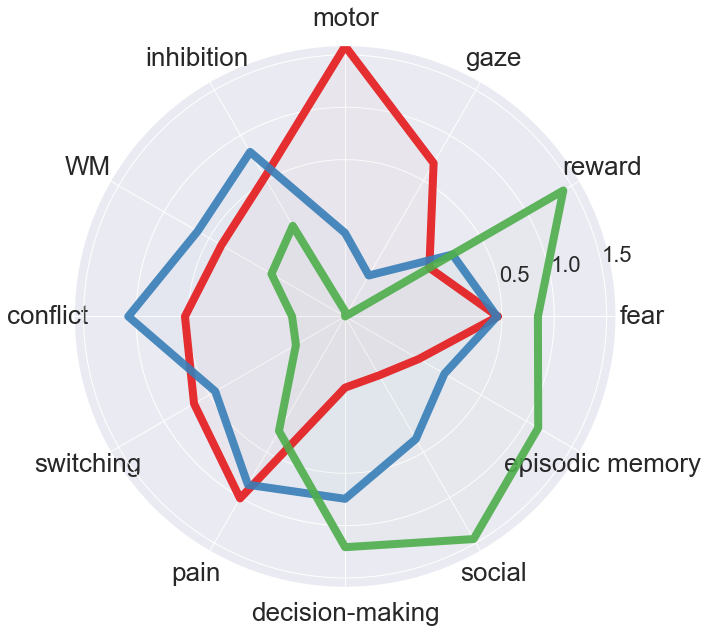

In [10]:
_ = plot_clf_polar(clf, n_top=4, reorder=False, feature_names = feature_nicknames,  labels=selected_labels)